# Welcome to Assingment  1 of Machine Learning Course 5DV194! 
The task is to create a classifier for cancer diagnose (malignant or benign)
#### Deadline of Assignment 1:
28 Feb. 2022 (17:00 Stockholm time)

#### Goal 
To get familar with (installation and usage) Jupyter notebook and machine learning library Sklearn (https://scikit-learn.org/stable/) by applying four different classification algorithms (KNN, Logistic Regression, SVM, Decision Tree) on the same task.  Additionally, you also call functions for data scaling, regularization, and kernel function.
#### Dataset
Breast Cancer Wisconsin (Diagnostic) Database.
https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)

 

#### Grading (200 points)
##### 100 points 
Follow this jupyter notebook file below, you will find some Tasks (answer by coding) and Questions(answer by text).
##### 40 points 
In SVM algorithm, you will be asked to implement two kernel functions and apply them in your SVM model.  
##### 60 points (report)
More instruction in report file "Report Template for Assignment-3 (5DV194)".  
 

Compress report PDF and this jupyter notebook file in a zip file and name the zip file in the format of "FirstName_LastName_assignment1.zip", upload to Canvas/Assignments/Assignment-1. 


## Get the data

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np

In [2]:
cancer = load_breast_cancer()
#print the predicton labels (target names)
list(cancer.target_names)

['malignant', 'benign']

In [3]:
# Organize our data
label_names = cancer['target_names']
labels = cancer['target']
feature_names = cancer['feature_names']
features = cancer['data']

In [4]:
# see the data
print (label_names) 
print (len(labels))
print (len(feature_names))
print (len(features))

['malignant' 'benign']
569
30
569


## Discover the data to gain insights

#### Task-1: print out the number of features the breast cancer dataset has.

In [5]:
print(len(feature_names))

30


#### Task-2: print out the size of the data set (i.e., number of samples)

In [6]:
print(len(labels))

569


#### Task-3: print out the number of instances of malignant and the number of instances of benign.

In [7]:
cancer['target']=pd.Series(data=cancer.target)
data=pd.Series(cancer['target'].value_counts(ascending=True))
data.index="malignant benign".split()
print(data)

malignant    212
benign       357
dtype: int64


## Tiny practice to prepare training and test data for algorithms

Below we will split dataset into training dataset (x) and testing dataset (y)

#### import train_test_split from sklearn

In [8]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

#### Split our data with traing data test_size=0.3

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3)

#### Question（no coding need）: Is above split of training/testing is random? How to make the training and test data fixed, so you can reproduce your results?

answer:Yes. Split of trauning/testing is random.
Make the training and test data fixed by set cancer.data = 0.7 and cancer.target = 0.3.
X_train, X_test, y_train, y_test = train_test_split(cancer.data=0.7, cancer.target=0.3, test_size=0.3)

Okay, we just finish some warming excercises, in the following, we will train four different classifier and use them to do cancer prediction respectively.

## General Learning Process
#### 1. load the data and prepare the data
#### 2. Implement an algorithm
#### 3. Train the algorithm, verify accuracy, and optimize.
#### 4. Predict on test data.
#### 5. Output the prediction performance

Note that in this assigment, to run the tasks, you are not requied to implment the classifiction algorithms, which are already implemented in backend in sklearn library. It is your responsibility to explore which function can be used and should be used to implement the Tasks below.  Furthermore, feel free to explore new functions though not mandatory. 

## Algorithm1: KNN

#### okay, now let's asume we start from scratch to use KNN for this classification task. 
#### Task-4: load cancer data as you did in above warming excercise

In [11]:
from sklearn.datasets import load_breast_cancer

#### Task-5: split data into training data and test data, keep training/test size as default, but specify a fixed value for random_state yourself. 

In [12]:
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,train_size=0.7,random_state=1)

## Select an algorithm
#### Train KNN model using KNeighborsClassifier in sklearn

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

#### We predict cancer on the test data using the trained KNN and output the prediction results

In [14]:
prediction = knn.predict(X_test)
print (prediction)

[0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0
 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0
 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1]


#### we output the accuracies of the trained KNN model on training data and test data respectively.

In [15]:
print (knn.score(X_train, y_train))
print (knn.score(X_test, y_test))

0.9371859296482412
0.9298245614035088


#### Task-6: round down the floats to two decimals?

In [16]:
print (round(knn.score(X_train, y_train),2))
print (round(knn.score(X_test, y_test),2))

0.94
0.93


#### Next, we are going to do some optimization, to explore the best N value.

####  Task-7: print out the value of N in your above trianed KNN?

In [32]:
import math
N=math.sqrt(len(labels))/2
print(round(N))

12


####  Task-8: try different N (e.g., [1,10]), and print out the accuracy when N is applied with different values.

In [76]:
neighbors_settings = range(1, 10)
for n_neighbors in neighbors_settings:
    knn1 = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn1.fit(X_train, y_train)
    train_decimal=knn.score(X_train, y_train)
    test_decimal=knn.score(X_test, y_test)
    print(round(test_decimal,2))
    print(round(train_decimal,2))


0.94
0.93
0.94
0.93
0.94
0.93
0.94
0.93
0.94
0.93
0.94
0.93
0.94
0.93
0.94
0.93
0.94
0.93


## Algorithm2: Logistic Regression

In [39]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

####  Task-9: Split the data into training data and test data as you did above, this time try to not copy but write the code yourself

In [40]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,train_size=0.7,random_state=42)

####  Task-10: Train logistic regression model

In [41]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
 
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)  

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Below we predict cancer on the test data using the trained logistic regression model

In [42]:
prediction = log_reg.predict(X_test)

####  Task-11: print out the accuracies of the trained  logistic regression model on training data and test data respectively.

In [43]:
print (round(log_reg.score(X_train, y_train),2))
print (round(log_reg.score(X_test, y_test),2))

0.94
0.97


#### Optimization (Regularization)

#### Task-12: Train a logistic regression model by modifying the regularization parameter C to different values (e.g., 100), 

In [44]:
for i,C in enumerate((100, 1, 0.01)):
    log_reg1 = LogisticRegression(C=C, penalty='l1', solver='liblinear')
    log_reg1.fit(X_train, y_train)
 

#### Task-13: print the corresponding training and testing accuracy to see the differences

In [45]:
for i,C in enumerate((100, 1, 0.01)):
    log_reg1 = LogisticRegression(C=C, penalty='l1', solver='liblinear')
    log_reg1.fit(X_train, y_train)
    print (round(log_reg1.score(X_train, y_train),2))
    print (round(log_reg1.score(X_test, y_test),2))

0.98
0.98
0.95
0.96
0.91
0.95


#### Task-14: Lower the regularization parameter C as 0.01, and print out the corresponding training and testing accuracy.

In [46]:
log_reg2 = LogisticRegression(C=0.01, penalty='l1', solver='liblinear')
log_reg2.fit(X_train, y_train)
print (round(log_reg2.score(X_train, y_train),2))
print (round(log_reg2.score(X_test, y_test),2))

0.91
0.95


## Algorithm3: SVM

#### We are loading data and splitting data into training data and test data 

In [47]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)


from sklearn.preprocessing import MinMaxScaler
X, y = load_breast_cancer(return_X_y=True)
X_scaled = MinMaxScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

####  Task-15:  train a SVM model using SVC model in sklearn

In [48]:
import numpy as np
from sklearn import svm
from sklearn import metrics
from sklearn.svm import SVC 

#codes to train a SVM model

svm=SVC()
svm.fit(X_test,y_test)

SVC()

#### We predict cancer on the test data using the trained SVM model

In [49]:
prediction = svm.predict(X_test)

####  Task-16: print out the accuracy of the training and prediction respectively.

In [50]:
print (round(svm.score(X_train,y_train),2))

0.97



#### Optimization by using kernel function
#### Task-17: print the name of the default kernel function in above model.

In [90]:
print(svm.kernel)

rbf


#### Okay, now we will have a little bit harder nut to crack :-) 
#### Task-18:  implement two kernel functions (linear and Gaussian) on your own and evaluate them.

In [52]:
# kernel=linear
def my_kernel_linear(xi,xj):
    return np.dot(xi,xj.T)
  

In [53]:
# kernel=Gaussian = RBF
def my_kernel_gaussian(xi,xj):
    z=np.dot(((xi-xj)),(xi-xj).T)
    return (1/np.sqrt(2*np.pi))*np.exp(-0.5*z**2)

#### Now, let's replace the default kernel function with your kernel.  

In [54]:
svm_linear_kernel = SVC(kernel=my_kernel_linear)
svm_linear_kernel.fit(X_train, y_train)

SVC(kernel=<function my_kernel_linear at 0x000001CC0AF80AF0>)

####  Task-19: print out the accuracy  of SVM models with kernel function my_kernel_linear.

In [55]:
print (svm_linear_kernel.score(X_train,y_train))

0.9802197802197802


#### Below, we replace the default kernel function with the gaussian kernel you wrote.  

In [56]:
svm_gaussian_kernel = SVC(kernel=my_kernel_gaussian)
svm_gaussian_kernel.fit(X_train, y_train)

SVC(kernel=<function my_kernel_gaussian at 0x000001CC0AF80DC0>)

#### Task-20: print out the accuracy of SVM models with kernel function my_kernel_gaussian

In [57]:
print (svm_gaussian_kernel.score(X_train,y_train))

0.6373626373626373


## Algorithm4:  Decision Tree

#### Okay, after above repetitive practices.  I would let you complete the whole training and testing process by yourself for decision tree. 

####  get data, split into traing data and test data

In [58]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3)

####  Task-21: train a Decision Tree model using DecisionTreeClassifier in sklearn

In [59]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

#### Task-22: predict cancer on the test data using the trained Decision Tree model

In [60]:
prediction = dtc.predict(X_test)
print (prediction)

[1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 0
 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0
 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1
 1 1 0 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0]


####  Task-23: output the accuracies of the trained  logistic regression model on training data and test data respectively.

In [61]:
print (round(dtc.score(X_train, y_train),2))
print (round(dtc.score(X_test, y_test),2))

1.0
0.91


#### Task-24: output the feature importances in this decision tree.

In [62]:
importance = dtc.feature_importances_
print(importance)

[0.         0.03170051 0.00858198 0.         0.0254161  0.00715165
 0.         0.         0.00715165 0.         0.         0.
 0.         0.         0.         0.         0.00290536 0.00887383
 0.01058714 0.         0.0101911  0.05800291 0.         0.69543643
 0.         0.         0.         0.13400133 0.         0.        ]


#### Task-25: using matplotlib.pyplot to visualize feature importance value

In [63]:
import matplotlib.pyplot as plt

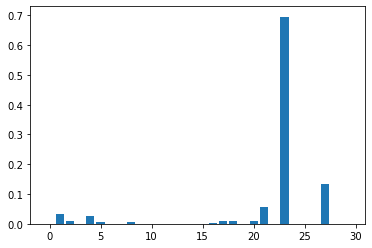

In [64]:
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#### Congratualtions if you run through above!  
#### If you are already familar with the training process using Sklearn, feel free to try other settings to improve the accuracy.
 